In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [14]:
for i in range(data.shape[0]):
    if data.loc[i, 'price_change'] == -1:
        data.loc[i, 'price_change'] = 0

In [15]:
target = 'price_change'

train = data.sample(frac=0.7, random_state=1)
test = data.drop(train.index).sample(frac=1.0, random_state=1)

y_train = train[target]
x_train = train.drop(columns=target)

y_test = test[target]
x_test = test.drop(columns=target)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
import tensorflow as tf

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(1395),
    tf.keras.layers.Dense(40),
    tf.keras.layers.Dense(40),
    tf.keras.layers.Dense(40),
    tf.keras.layers.Dense(2)
])

In [18]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='mean_squared_error',
               metrics=['accuracy'])

In [19]:
epoch = 500
historial = modelo.fit(x_train, y_train,
                       validation_data=(x_test, y_test),
                       epochs=epoch)

Epoch 1/500
5/5 [==============================] - 1s 44ms/step - loss: 4.6135 - accuracy: 0.5252 - val_loss: 2.1983 - val_accuracy: 0.4746
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 7.2848 - accuracy: 0.6115 - val_loss: 0.9057 - val_accuracy: 0.4576
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 4.5295 - accuracy: 0.6043 - val_loss: 0.8488 - val_accuracy: 0.5085
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 2.8721 - accuracy: 0.4029 - val_loss: 0.9363 - val_accuracy: 0.5085
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 3.6578 - accuracy: 0.4460 - val_loss: 0.6804 - val_accuracy: 0.5593
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 2.9197 - accuracy: 0.6978 - val_loss: 0.4368 - val_accuracy: 0.4068
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 1.9489 - accuracy: 0.3957 - val_loss: 0.3781 - val_accuracy: 0.4576
Epoch 8/500
5/5 [========

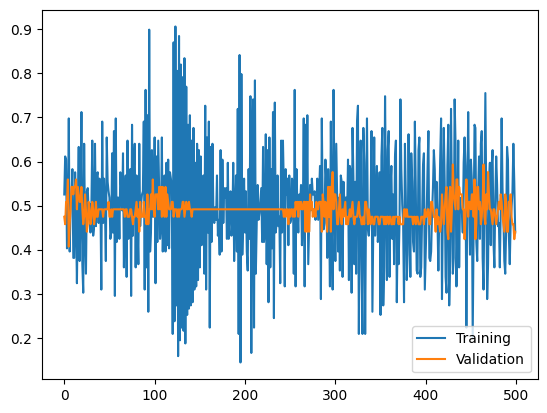

In [20]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']
loss = historial.history['loss']
val_loss = historial.history['val_loss']

plt.plot(range(epoch), acc, label='Training')
plt.plot(range(epoch), val_acc, label='Validation')
plt.legend(loc='lower right')

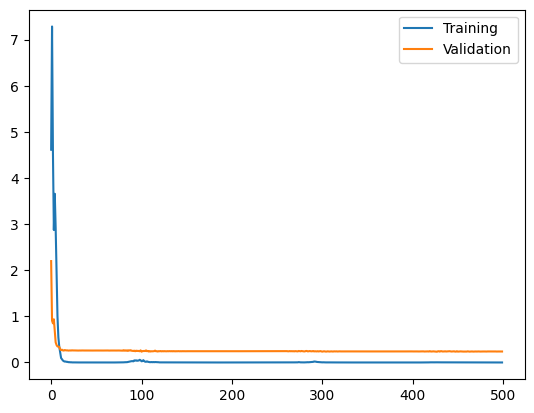

In [21]:
plt.plot(range(epoch), loss, label='Training')
plt.plot(range(epoch), val_loss, label='Validation')
plt.legend(loc='upper right')

2/2 [==============================] - 0s 2ms/step


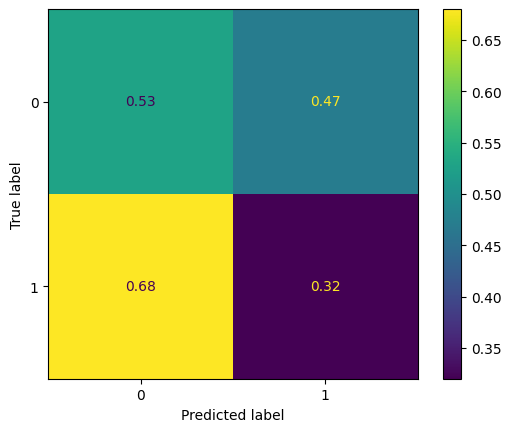

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = modelo.predict(x_test)
cf = confusion_matrix(y_test, list(map(np.argmax, y_pred)), normalize='true')
ConfusionMatrixDisplay(cf).plot()